In [36]:
import pandas as pd

data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [37]:
bankdata['class'].unique()

array([0, 1])

In [38]:
bankdata.shape

(1372, 5)

In [39]:
bankdata['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [40]:
bankdata['class'].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

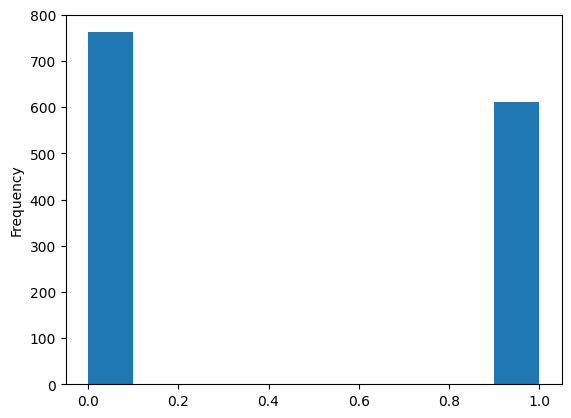

In [41]:
bankdata['class'].plot.hist();

In [42]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


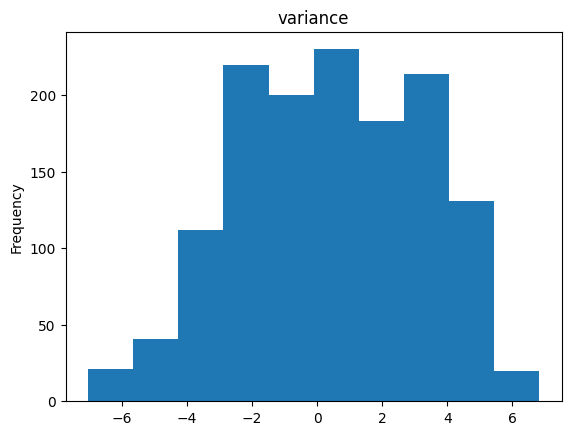

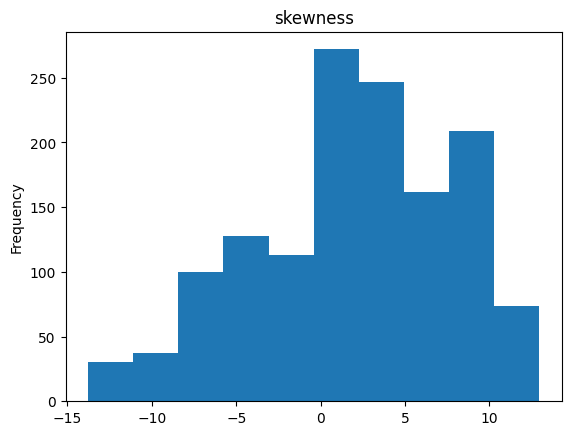

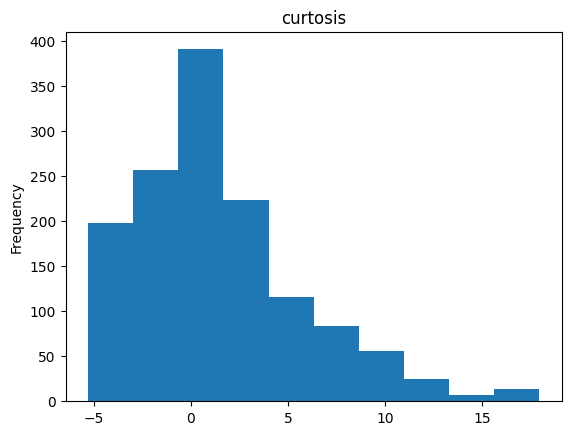

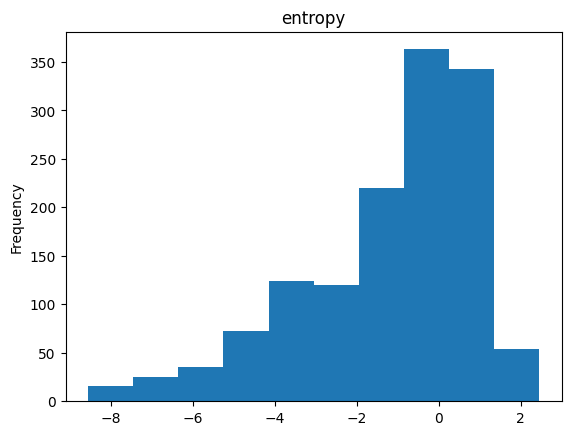

In [43]:
import matplotlib.pyplot as plt

for col in bankdata.columns[:-1]:
    plt.title(col)
    bankdata[col].plot.hist() #plotting the histogram with Pandas
    plt.show();

variance skewness


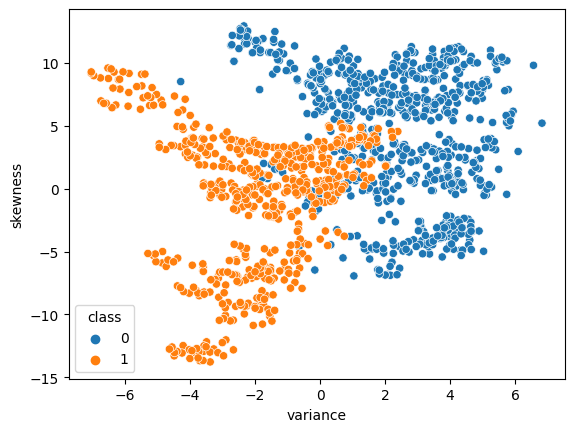

variance curtosis


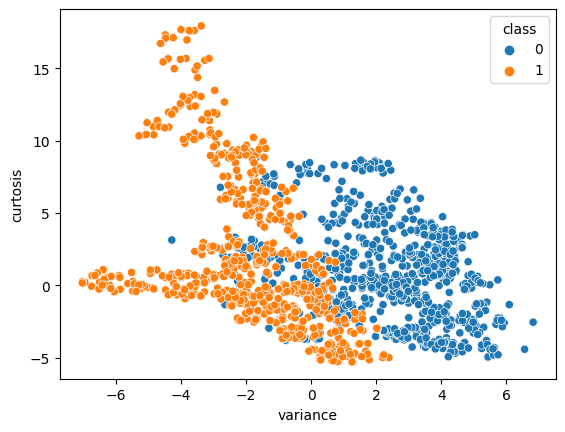

variance entropy


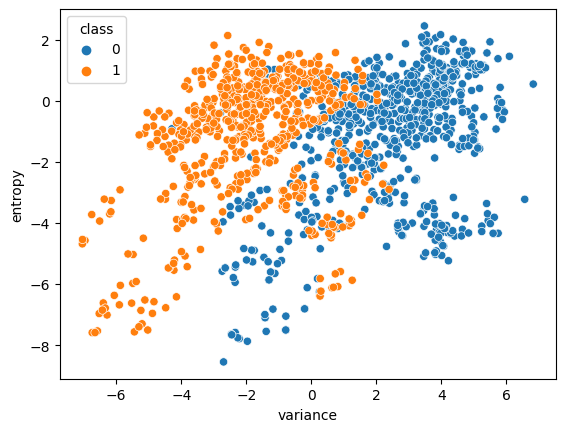

skewness variance


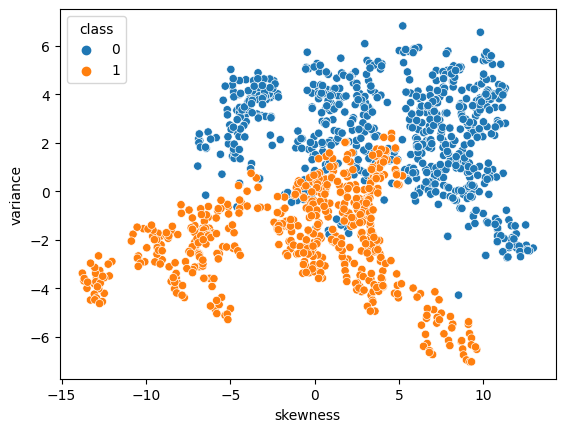

skewness curtosis


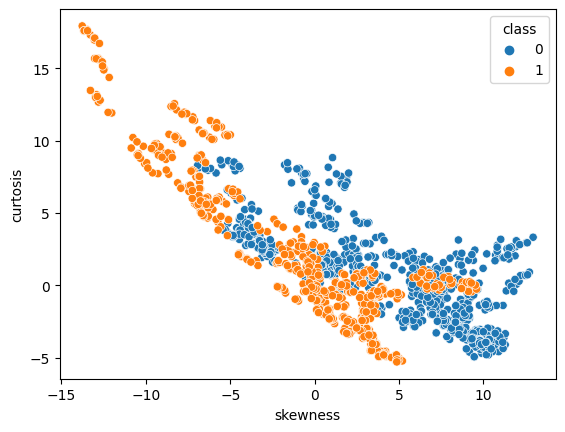

skewness entropy


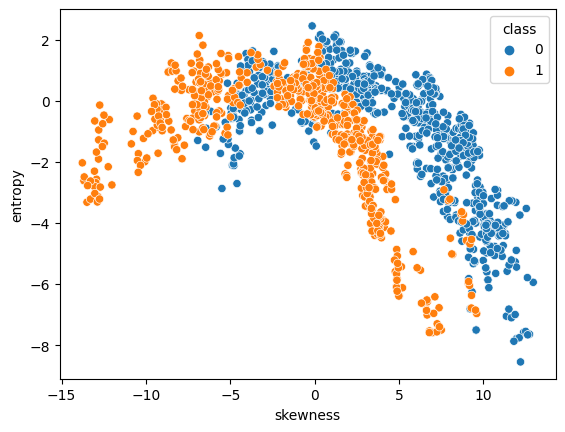

curtosis variance


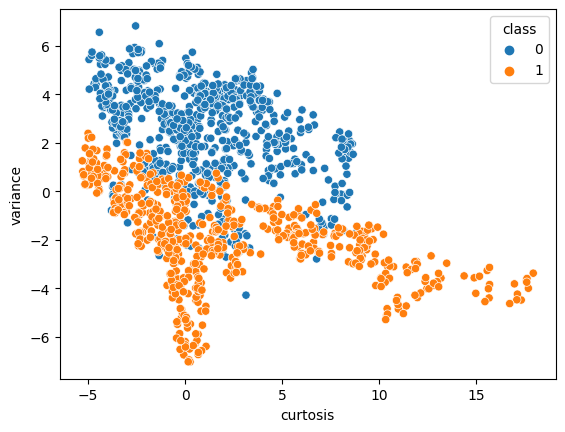

curtosis skewness


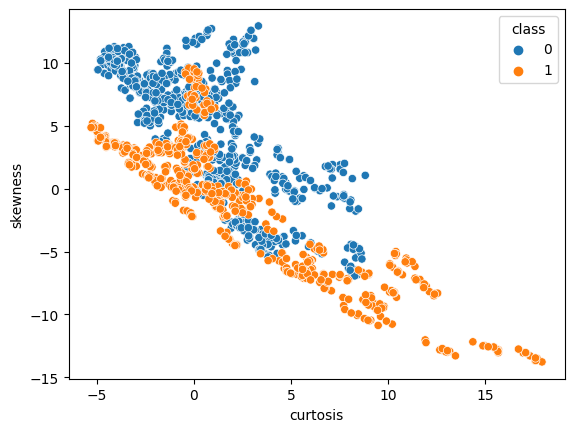

curtosis entropy


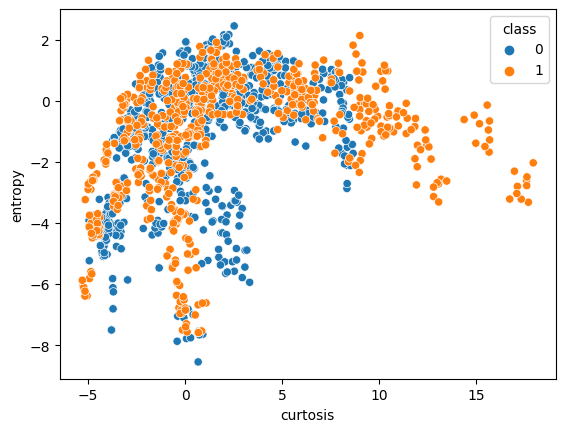

entropy variance


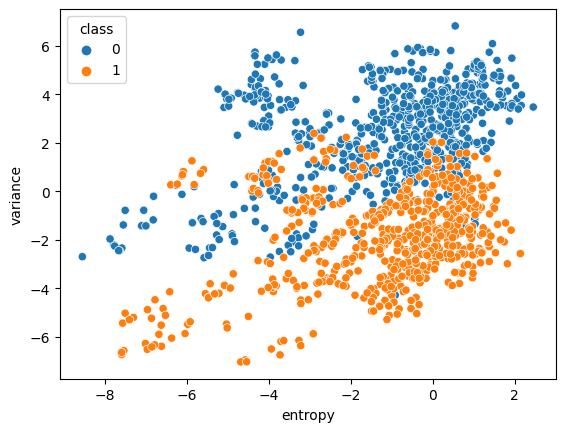

entropy skewness


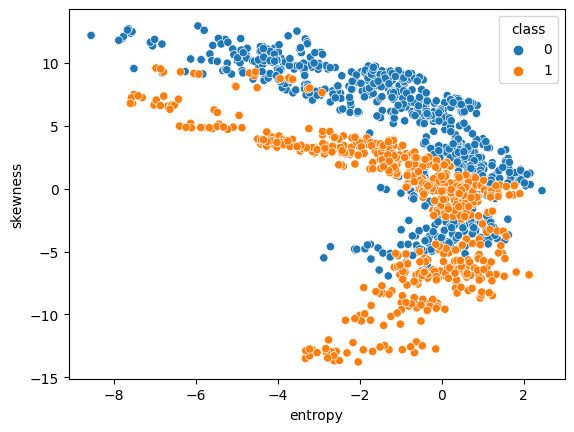

entropy curtosis


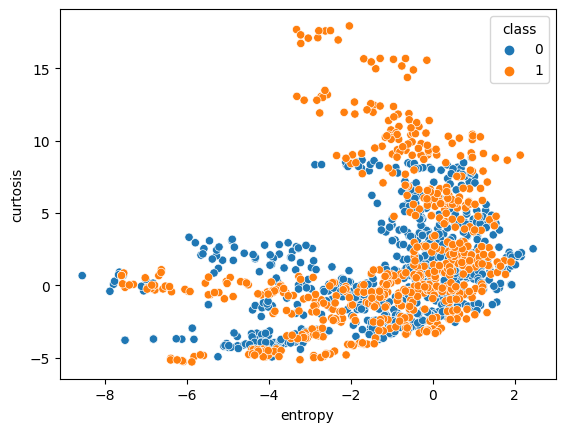

In [44]:
import seaborn as sns

for feature_1 in bankdata.columns[:-1]:
    for feature_2 in bankdata.columns[:-1]:
        if feature_1 != feature_2: # test if the features are different
            print(feature_1, feature_2) # prints features names
            sns.scatterplot(x=feature_1, y=feature_2, data=bankdata, hue='class') # plots each feature points with its color depending on the class column value
            plt.show();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


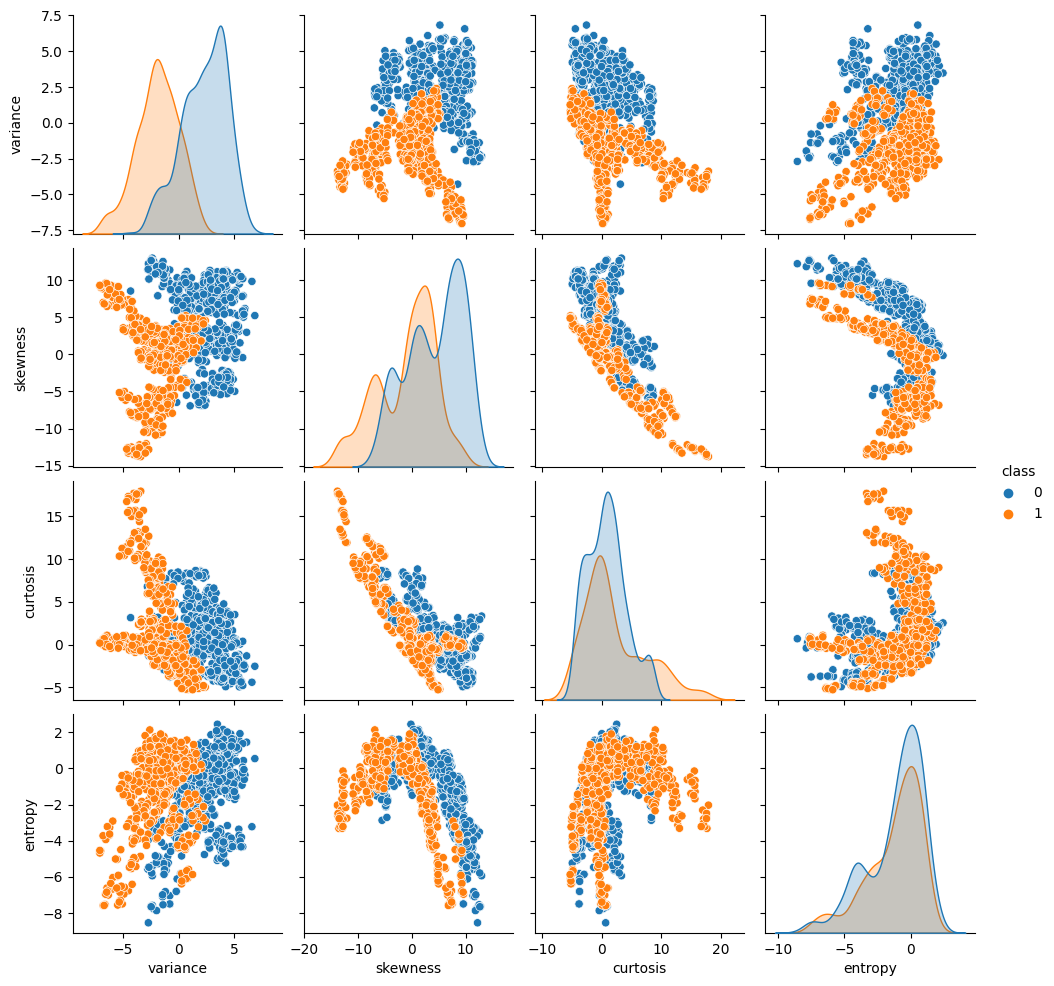

In [45]:
sns.pairplot(bankdata, hue='class');

In [46]:
y = bankdata['class']
X = bankdata.drop('class', axis=1) # 

In [47]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [48]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [50]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



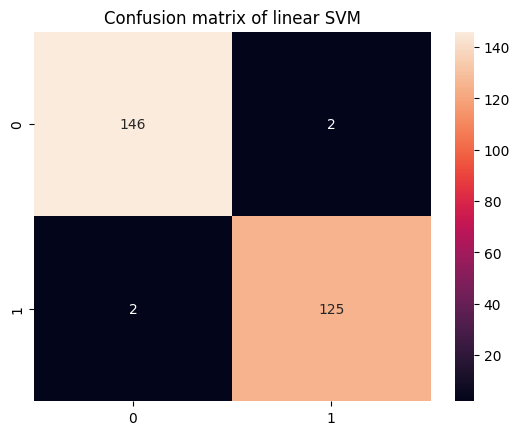

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.98      0.99      0.99       483

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



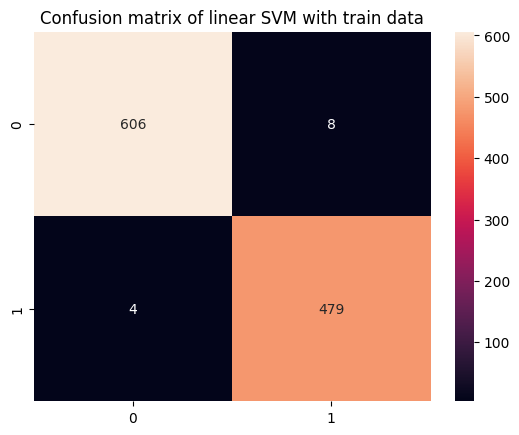

In [53]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))